In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1
samples = [rng() for _ in range(1000)]

#Задача 1 Реализовать serial test и применить к выборке samples

(array([ 6., 12.,  5.,  2.,  2.,  3.,  4.,  7.,  3.,  3.,  6.,  4.,  5.,
         1., 10.,  8.,  5.,  4.,  6.,  3.,  4.,  6.,  4.,  8.,  5.,  5.,
         2.,  4.,  3.,  2.,  3.,  5.,  5.,  3.,  8.,  5.,  5.,  8.,  5.,
        13.,  7.,  4.,  4.,  5.,  3.,  3.,  4.,  7.,  3.,  0.,  3.,  6.,
         0.,  4.,  5.,  6.,  4.,  6.,  5.,  6.,  2.,  6.,  3.,  3.,  8.,
         5.,  3.,  4.,  9.,  0.,  2.,  7.,  9.,  7.,  8.,  6.,  5.,  4.,
         7.,  1.,  7.,  5.,  2.,  6.,  4.,  5.,  6.,  9.,  7.,  5.,  3.,
         7.,  7.,  5.,  7.,  7.,  3.,  3.,  7.,  9.]),
 array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]),
 Power_divergenceResult(statistic=114.39999999999999, pvalue=0.1380441495447643))

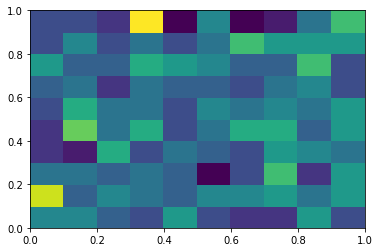

In [9]:
k = 10
samplesX = samples[::2]
samplesY = samples[1::2]
f_obs = (plt.hist2d(samplesX, samplesY, [np.linspace(0, 1, k+1), np.linspace(0, 1, k+1)])[0]).reshape(k**2,)
f_exp = np.full(k**2, len(samples) // (2*k**2))
f_obs, f_exp, stats.chisquare(f_obs, f_exp)

#Задача 3 Привести статистический тест, который покажет, что с rng_bad есть проблемы, а с rng - нет.

In [31]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random = [rng() for _ in range(30000)]
random_bad = [rng_bad() for _ in range(30000)]
print(stats.kstest(random, stats.uniform.cdf))
print(stats.kstest(random_bad, stats.uniform.cdf))

KstestResult(statistic=0.004293912258744259, pvalue=0.6361166407983746)
KstestResult(statistic=0.008437018050998446, pvalue=0.027777953265237354)


#Задача 4 Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

[ 61 152  94 132 153 247  59   9   0  93]
0.002546548843383789 seconds


Text(0, 0.5, 'amount')

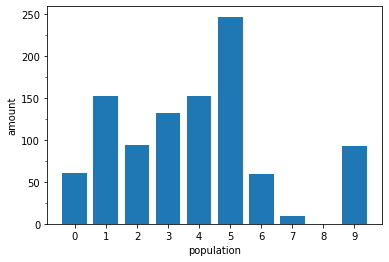

In [59]:
import time
from random import choices
import matplotlib.ticker as ticker
population = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
weights = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]
start = time.time()
samp = choices(population, weights, k = 1000)
hist =np.bincount(samp, minlength = 10)
print(hist)
finish = time.time()
print(str(finish-start) + ' seconds')
fig, ax = plt.subplots()
plt.bar(population, hist)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(25))
plt.xlabel('population', fontsize = 10)
plt.ylabel('amount', fontsize = 10)

[  0  10  49  62  81 103 123 159 146 267]
0.0012671947479248047 seconds


Text(0, 0.5, 'amount')

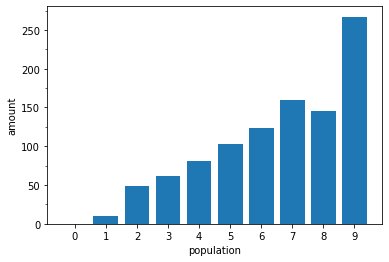

In [58]:
import time
from random import choices
import matplotlib.ticker as ticker
population = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
weights = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]
weight1 = sorted(weights)
start = time.time()
samp = choices(population, weight1, k = 1000)
hist =np.bincount(samp, minlength = 10)
print(hist)
finish = time.time()
print(str(finish-start) + ' seconds')
fig, ax = plt.subplots()
plt.bar(population, hist)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(25))
plt.xlabel('population', fontsize = 10)
plt.ylabel('amount', fontsize = 10)

#Задача 5 Смоделируйте выборку размера 1000 из распределения  Exp(λ)  с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

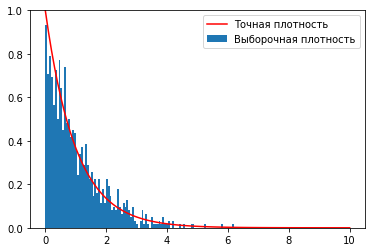

In [62]:
import math
r = [np.random.rand() for i in range(1000)]
new=np.array([-math.log((1-r[i])) for i in range (1000)])
x = np.linspace(0, 10, 100)
x1=np.array([math.exp(-x[i]) for i in range (100)])
plt.hist( new, density=True, bins = 100, label = "Выборочная плотность")
plt.ylim(0, 1)
plt.plot(x, x1, label = "Точная плотность", color = 'r')
plt.legend()

#Задача 6 Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из распределения с плотностью  excos2x  на отрезке  [−π/2,π/2] . По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

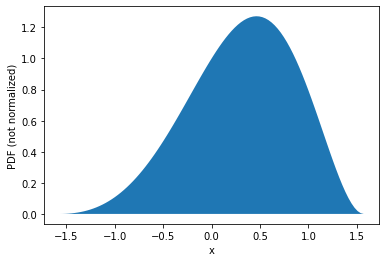

In [74]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x)*np.cos(x)**2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.show()

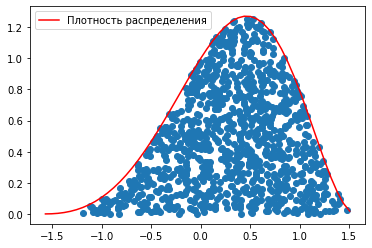

In [90]:
left, right = -np.pi/2, np.pi/2
def d(x):
 return np.exp(x) * np.cos(x)**2
selection = np.zeros(1000)
x1 = []
y1 = []
i = 0
while (i < 1000):
  point = np.random.rand(2)
  x = point[0]*(right - left)+left
  y = point[1]*1.3
  if (y < d(x)):
    x1.append(x)
    y1.append(y)
    i += 1
plt.scatter(x1,y1)
X = np.arange(-np.pi/2, np.pi/2, np.pi/50)
plt.plot(X, d(X),color = 'red', label = "Плотность распределения")
plt.legend()

#Задача 7 Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

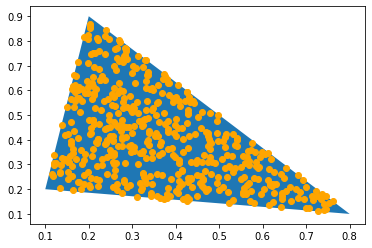

In [69]:
import numpy as np
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


lr = np.array([np.random.rand() for i in range(500)])
ur= np.array([np.random.rand() for i in range(500)])

x=0.1 *(1+1*np.sqrt(lr))
y=0.1 *(2+7*np.sqrt(lr))
x=x+np.sqrt(lr)*ur*0.6
y=y-np.sqrt(lr)*ur*0.8
polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(x, y, color = 'orange')
plt.show()

#Задача 8 Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

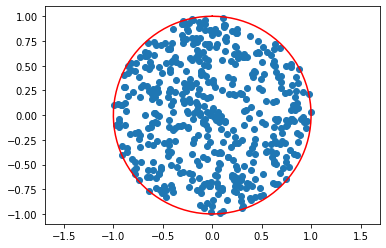

In [70]:
from matplotlib.patches import Circle
import numpy as np
import matplotlib.pyplot as plt
v = np.random.rand(500,2)
v[:,0] = 2*np.pi*v[:,0]
v[:,1] = np.sqrt(v[:,1])
x = v[:,1]*np.cos(v[:,0])
y = v[:,1]*np.sin(v[:,0])
plt.scatter(x,y)
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t), color = 'r')
plt.axis('equal')
plt.show()

#Задача 9 Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20, -4], [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

Text(0.5, 1.0, 'Histogram of y')

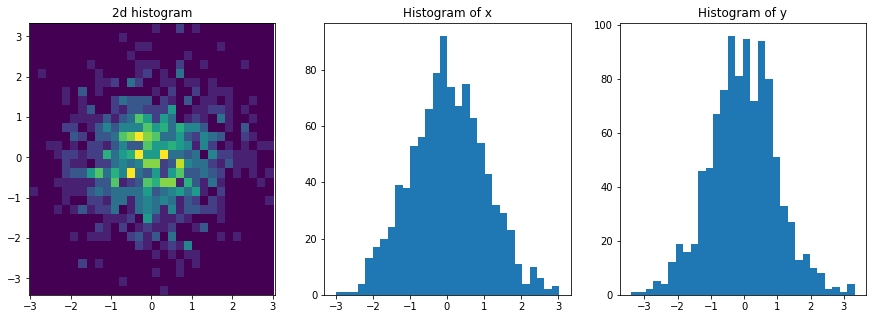

In [71]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")

Text(0.5, 1.0, 'Histogram of yc')

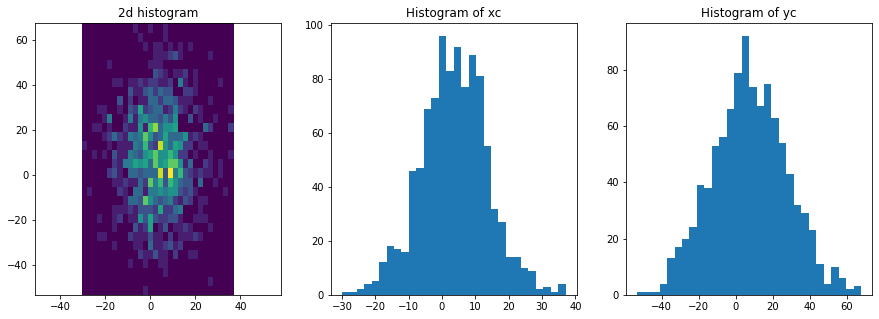

In [73]:
Cov = np.array([[20,-4],[-4,40]])
d=0
c= (Cov[1][1] - d * d)**1/2
a=Cov[1][0]/c
b=(Cov[0][0] - a * a)**1/2
xc = a * x + b * y + 4
yc = c * x + d * y + 7
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(xc, yc, bins=30)
ax[0].axis('equal')
ax[1].hist(xc, bins=30)
ax[2].hist(yc, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of xc")
ax[2].set_title("Histogram of yc")